In [1]:
import os
import zipfile
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
# Please download the cats_and_dogs_filtered.zip and unzip the zip file

!wget --no-check-certificate \
    https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip \
    -O /tmp/cats_and_dogs_filtered.zip
local_zip = '/tmp/cats_and_dogs_filtered.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

In [3]:
base_dir = '/tmp/cats_and_dogs_filtered'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

# Directory with our training cat pictures
train_cats_dir = os.path.join(train_dir, 'cats')

# Directory with our training dog pictures
train_dogs_dir = os.path.join(train_dir, 'dogs')

# Directory with our validation cat pictures
validation_cats_dir = os.path.join(validation_dir, 'cats')

# Directory with our validation dog pictures
validation_dogs_dir = os.path.join(validation_dir, 'dogs')

In [4]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(lr=1e-4),
              metrics=['accuracy'])



# This code has changed. Now instead of the ImageGenerator just rescaling
# the image, we also rotate and do other operations
# Updated to do image augmentation
train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

validation_datagen = ImageDataGenerator(rescale=1./255)

# Flow training images in batches of 20 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        train_dir,  # This is the source directory for training images
        target_size=(150, 150),  # All images will be resized to 150x150
        batch_size=20,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

# Flow validation images in batches of 20 using test_datagen generator
validation_generator = validation_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

history = model.fit(
      train_generator,
      steps_per_epoch=100,  # 2000 images = batch_size * steps
      epochs=100,
      validation_data=validation_generator,
      validation_steps=50,  # 1000 images = batch_size * steps
      verbose=2)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 100 steps, validate for 50 steps
Epoch 1/100
100/100 - 40s - loss: 0.6935 - accuracy: 0.5270 - val_loss: 0.6821 - val_accuracy: 0.5790
Epoch 2/100
100/100 - 68s - loss: 0.6794 - accuracy: 0.5715 - val_loss: 0.6492 - val_accuracy: 0.5870
Epoch 3/100
100/100 - 71s - loss: 0.6539 - accuracy: 0.6015 - val_loss: 0.6131 - val_accuracy: 0.6430
Epoch 4/100
100/100 - 92s - loss: 0.6298 - accuracy: 0.6400 - val_loss: 0.6078 - val_accuracy: 0.6480
Epoch 5/100
100/100 - 49s - loss: 0.6250 - accuracy: 0.6625 - val_loss: 0.5911 - val_accuracy: 0.6730
Epoch 6/100
100/100 - 47s - loss: 0.6212 - accuracy: 0.6485 - val_loss: 0.5679 - val_accuracy: 0.7020
Epoch 7/100
100/100 - 54s - loss: 0.5934 - accuracy: 0.6830 - val_loss: 0.5707 - val_accuracy: 0.6930
Epoch 8/100
100/100 - 114s - loss: 0.5889 - accuracy: 0.6895 - val_loss: 0.5717 - val_accuracy: 0.6790
Epoch 

Epoch 78/100
100/100 - 94s - loss: 0.3776 - accuracy: 0.8255 - val_loss: 0.5002 - val_accuracy: 0.7680
Epoch 79/100
100/100 - 116s - loss: 0.3882 - accuracy: 0.8245 - val_loss: 0.5091 - val_accuracy: 0.7720
Epoch 80/100
100/100 - 118s - loss: 0.3858 - accuracy: 0.8320 - val_loss: 0.4326 - val_accuracy: 0.7900
Epoch 81/100
100/100 - 113s - loss: 0.3817 - accuracy: 0.8260 - val_loss: 0.4599 - val_accuracy: 0.7930
Epoch 82/100
100/100 - 114s - loss: 0.3806 - accuracy: 0.8335 - val_loss: 0.4341 - val_accuracy: 0.7950
Epoch 83/100
100/100 - 101s - loss: 0.3686 - accuracy: 0.8335 - val_loss: 0.4244 - val_accuracy: 0.8070
Epoch 84/100
100/100 - 113s - loss: 0.3603 - accuracy: 0.8385 - val_loss: 0.4386 - val_accuracy: 0.8000
Epoch 85/100
100/100 - 118s - loss: 0.3696 - accuracy: 0.8410 - val_loss: 0.4242 - val_accuracy: 0.8000
Epoch 86/100
100/100 - 114s - loss: 0.3720 - accuracy: 0.8310 - val_loss: 0.4379 - val_accuracy: 0.7960
Epoch 87/100
100/100 - 117s - loss: 0.3616 - accuracy: 0.8320 - v

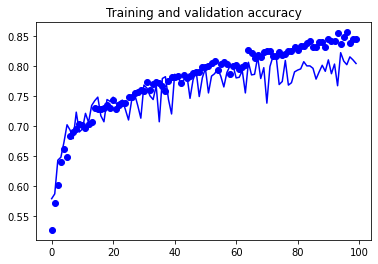

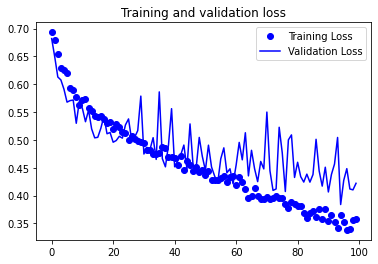

In [5]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()